* 배경

기존의 금융기관은 일반적으로 병원 대출 시 신용점수 또는 담보물 위주의 평가를 진행합니다. 반면, 한국의 핀테크 기업인 모우다(MOUDA)는 상환 기간 동안의 계속 경영 여부를 예측하여 신용 점수가 낮거나 담보를 가지지 못하는 우수 병원들에게 금융 기회를 제공하려 합니다.

이번 대회에서 폐업을 하는 병원을 예측하는 모델을 만들어주세요. 모우다에서는 폐업 예측을 기반으로 대출 여부를 결정합니다. 모델이 정확할 수록 원금 손실이 줄어듭니다.

#### 2.1 컬럼명세

> 컬럼의 경우 총 58개의 열로, 크게 병원에 대한 기본정보와 재무(회계)정보로 나누어짐

> ```기본정보```

inst_id - 각 파일에서의 병원 고유 번호

OC – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함

sido – 병원의 광역 지역 정보

sgg – 병원의 시군구 자료

openDate – 병원 설립일

bedCount - 병원이 갖추고 있는 병상의 수

instkind – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류

종합병원 : 입원환자 100명 이상 수용 가능

병원 : 입원 환자 30명 이상 100명 미만 수용 가능

의원 : 입원 환자 30명 이하 수용 가능

한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.  

> ```재무(회계)``` 정보 ( * 1의 경우 17년도, 2의 경우 16년도 데이터를 의미)

revenue1 – 매출액, 2017(회계년도)년 데이터를 의미함

salescost1 – 매출원가, 2017(회계년도)년 데이터를 의미함

sga1 - 판매비와 관리비, 2017(회계년도)년 데이터를 의미함

salary1 – 급여, 2017(회계년도)년 데이터를 의미함

noi1 – 영업외수익, 2017(회계년도)년 데이터를 의미함

noe1 – 영업외비용, 2017(회계년도)년 데이터를 의미함

Interest1 – 이자비용, 2017(회계년도)년 데이터를 의미함

ctax1 – 법인세비용, 2017(회계년도)년 데이터를 의미함

Profit1 – 당기순이익, 2017(회계년도)년 데이터를 의미함

liquidAsset1 – 유동자산, 2017(회계년도)년 데이터를 의미함

quickAsset1 – 당좌자산, 2017(회계년도)년 데이터를 의미함

receivableS1 - 미수금(단기), 2017(회계년도)년 데이터를 의미함

inventoryAsset1 – 재고자산, 2017(회계년도)년 데이터를 의미함

nonCAsset1 – 비유동자산, 2017(회계년도)년 데이터를 의미함

tanAsset1 – 유형자산, 2017(회계년도)년 데이터를 의미함

OnonCAsset1 - 기타 비유동자산, 2017(회계년도)년 데이터를 의미함

receivableL1 – 장기미수금, 2017(회계년도)년 데이터를 의미함

debt1 – 부채총계, 2017(회계년도)년 데이터를 의미함

liquidLiabilities1 – 유동부채, 2017(회계년도)년 데이터를 의미함

shortLoan1 – 단기차입금, 2017(회계년도)년 데이터를 의미함

NCLiabilities1 – 비유동부채, 2017(회계년도)년 데이터를 의미함

longLoan1 – 장기차입금, 2017(회계년도)년 데이터를 의미함

netAsset1 – 순자산총계, 2017(회계년도)년 데이터를 의미함

surplus1 – 이익잉여금, 2017(회계년도)년 데이터를 의미함

employee1 – 고용한 총 직원의 수, 2017(회계년도)년 데이터를 의미함

employee2 – 고용한 총 직원의 수, 2016(회계년도)년 데이터를 의미함

ownerChange – 대표자의 변동 여부  

In [62]:
import pandas as pd
import numpy as np 
import scipy as sp
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%precision 3

'%.3f'

In [4]:
train = pd.read_csv('C:/Users/KIHyuk/Desktop/dacon_data/Data_병원개폐업/train.csv')

In [5]:
train.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.0,3.961135e+09,...,7.589937e+08,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same
1,3,open,gyeongnam,32,19970401,410.0,general_hospital,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,801.0,813.0,same
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,515483669.0,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.0,7.067740e+10,...,3.775501e+10,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.0,4.765605e+10,...,5.143259e+10,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same


In [6]:
train.shape

(301, 58)

In [7]:
test = pd.read_csv('C:/Users/KIHyuk/Desktop/dacon_data/Data_병원개폐업/test.csv')

In [8]:
test.head()

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,debt2,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange
0,2,NaN,incheon,139,19981125.0,300.0,general_hospital,6.682486e+10,0.000000e+00,6.565709e+10,...,5.540643e+10,5.068443e+10,3.714334e+10,4.720000e+09,4.690000e+09,1.608540e+10,8.944587e+09,693,693,same
1,5,NaN,jeju,149,20160309.0,44.0,hospital,3.495758e+10,0.000000e+00,3.259270e+10,...,6.730838e+10,4.209828e+10,2.420000e+10,2.521009e+10,1.830000e+10,3.789135e+09,0.000000e+00,379,371,same
2,6,NaN,jeonnam,103,19890427.0,276.0,general_hospital,2.326031e+10,2.542571e+09,2.308749e+10,...,0.000000e+00,2.777589e+10,2.182278e+10,0.000000e+00,0.000000e+00,0.000000e+00,1.638540e+10,NaN,NaN,NaN
3,8,NaN,busan,71,20100226.0,363.0,general_hospital,0.000000e+00,0.000000e+00,0.000000e+00,...,1.211517e+10,9.556237e+09,4.251867e+09,2.558931e+09,0.000000e+00,3.914284e+10,0.000000e+00,760,760,same
4,10,NaN,jeonbuk,26,20040604.0,213.0,general_hospital,5.037025e+10,0.000000e+00,4.855803e+10,...,4.395973e+10,7.535567e+09,3.298427e+09,3.642417e+10,2.134712e+10,2.574488e+10,1.507269e+10,437,385,same


In [9]:
test.shape

(127, 58)

In [10]:
# 개/폐업 별 병원 수 
train['OC'].value_counts()

open      286
 close     15
Name: OC, dtype: int64

In [11]:
open_hos = train.query("OC == 'open'")
close_hos = train.query("OC == ' close'")

* 개/폐업 별 병원위치 확인 <br>

    * 지방으로 갈수록 폐업율이 높을까?

In [12]:
open_hos['sido'].value_counts()

gyeonggi     44
gyeongbuk    37
gyeongnam    35
busan        25
choongnam    22
jeonnam      18
seoul        18
jeonbuk      16
daegu        14
choongbuk    13
daejeon      13
incheon      10
gangwon      10
ulsan         8
gwangju       2
sejong        1
Name: sido, dtype: int64

In [13]:
close_hos['sido'].value_counts()

gyeonggi     5
jeonnam      3
jeonbuk      2
gyeongbuk    2
busan        1
seoul        1
choongnam    1
Name: sido, dtype: int64

* 수도권/지방 여부는 개/폐업 여부에 크게 영향을 미치지 않는 것으로 보임

* 병원업종별 개/폐업 여부 확인
    * 종합병원 : 입원환자 100명 이상 수용 가능
    * 병원 : 입원 환자 30명 이상 100명 미만 수용 가능
    * 의원 : 입원 환자 30명 이하 수용 가능
    * 한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.

In [14]:
# 전체 병원데이터 업종 현황
train['instkind'].value_counts()

nursing_hospital        144
hospital                 88
general_hospital         37
clinic                   18
traditional_hospital      8
traditional_clinic        4
dental_clinic             1
Name: instkind, dtype: int64

In [15]:
# 현재 운영중인 병원의 업종 
open_hos['instkind'].value_counts()

nursing_hospital        139
hospital                 83
general_hospital         36
clinic                   17
traditional_hospital      7
traditional_clinic        3
dental_clinic             1
Name: instkind, dtype: int64

In [16]:
# 폐업한 병원의 업종
close_hos['instkind'].value_counts()

hospital                5
nursing_hospital        5
general_hospital        1
clinic                  1
traditional_hospital    1
traditional_clinic      1
Name: instkind, dtype: int64

* 업종과 개/폐업 여부는 큰 관계가 없는것으로 보임

* 개/폐업 병원의 지속년수를 살펴보자

In [17]:
i=0
def cal_year(x):
    global i
    i += 1
    result = 2017 - int(str(train.iloc[:,4].values[i-1])[:4])
    return result

In [18]:
train['지속년수'] = train['openDate'].apply(cal_year)

In [19]:
train.groupby('OC')['지속년수'].describe()

,count,mean,std,min,25%,50%,75%,max
OC,,,,,,,,
close,15.0,10.133333,9.054333,0.0,3.0,10.0,15.0,34.0
open,286.0,12.153846,8.887056,0.0,6.0,10.0,16.0,39.0


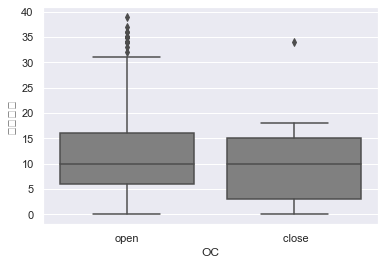

In [20]:
# boxplot 
sns.boxplot(x='OC', y='지속년수', data=train, color='gray')

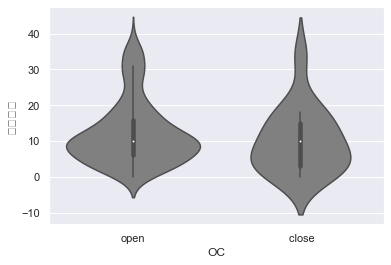

In [21]:
# violinplot
sns.violinplot(x='OC', y='지속년수', data=train, color='gray')

* 평균적으로 10~12년 사이에 병원의 개/폐업 여부가 결정?
    * 두 경우 모두 10년차 즈음에 주로 분포

* 결측값 고려
    * 재무정보에 대해 결측값 가진 병원

In [22]:
null_check = train.loc[(train.isnull().sum(1) >= 1) , : ]
null_check['OC'].value_counts() # 개/폐업별 결측값 개수

null_check_close = null_check.query("OC == ' close'")
null_check_open = null_check.query("OC == 'open'")

In [23]:
null_check_close.loc[ :, 'revenue1':'netAsset2'].isnull().sum(1)

35     0
71     0
93     0
193    0
212    0
297    0
298    0
299    0
dtype: int64

In [24]:
null_check_open.loc[ :, 'revenue1':'netAsset2'].isnull().sum(1)

1      47
14     47
32     47
48      0
55     47
60     47
62      0
206     0
230     0
242     0
248    47
257    47
258    47
263     0
285     0
300     0
dtype: int64

* 폐업병원들의 재무정보 결측치 확인 결과, 재무정보에는 결측값이 없음

* 운영중인 병원들중 재무정보 결측치가 없는 병원정보만 활용할것

In [25]:
# 재무정보 columns
money_info = ['revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2']

In [26]:
# 재무정보 결측치 제거
index_list = []
def drop_func(train):
    global index_list
    for i in range(len(train)):
        if train.loc[i,"revenue1":"surplus2"].isnull().sum() > 0:
            index_list.append(i)
    
    result = train.drop(index_list)
    return result

In [27]:
train = drop_func(train)

In [28]:
train

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,revenue1,salescost1,sga1,...,liquidLiabilities2,shortLoan2,NCLiabilities2,longLoan2,netAsset2,surplus2,employee1,employee2,ownerChange,지속년수
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,4.217530e+09,0.000000e+00,3.961135e+09,...,2.228769e+08,0.000000e+00,5.361169e+08,3.900000e+08,2.619290e+09,1.271224e+09,62.0,64.0,same,10
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,1.004522e+09,5.154837e+08,4.472197e+08,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,234.0,1.0,same,1
3,7,open,incheon,141,20000814,353.0,general_hospital,7.250734e+10,0.000000e+00,7.067740e+10,...,1.701860e+10,9.219427e+09,2.073641e+10,1.510000e+10,1.295427e+10,7.740829e+09,663.0,663.0,same,17
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,4.904354e+10,0.000000e+00,4.765605e+10,...,3.007259e+10,1.759375e+10,2.136001e+10,1.410803e+10,5.561941e+06,9.025550e+09,206.0,197.0,same,12
5,11,open,gyeongnam,155,20020501,243.0,general_hospital,3.358054e+10,9.222997e+09,2.372791e+10,...,2.186113e+10,1.708714e+10,2.000000e+07,0.000000e+00,0.000000e+00,5.879004e+09,397.0,390.0,same,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,7.614697e+09,4.153475e+08,5.903119e+09,...,2.618201e+09,0.000000e+00,6.805570e+09,5.930000e+09,5.379502e+09,8.116416e+08,193.0,141.0,same,12
297,423,close,choongnam,159,20140618,NaN,hospital,6.717144e+09,8.200000e+09,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,79.0,79.0,same,3
298,426,close,gyeongbuk,107,19830705,NaN,hospital,0.000000e+00,0.000000e+00,5.479428e+07,...,2.170973e+09,0.000000e+00,4.199124e+09,2.498749e+09,3.259161e+09,0.000000e+00,NaN,NaN,NaN,34
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,2.116892e+09,2.681748e+08,3.286245e+09,...,6.400000e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,100.0,NaN,NaN,10


In [31]:
train_result = train.copy() # 복사본

In [32]:
train_result = train.drop(money_info,axis=1)

In [33]:
train_result['매출액_증감액'] = train['revenue1'] - train['revenue2']
train_result['매출원가_증감액'] = train['salescost1'] - train['salescost2']
train_result['판매비관리비_증감액'] = train['sga1'] - train['sga2']
train_result['급여_증감액'] = train['salary1'] - train['salary2']
train_result['영업외수익_증감액'] = train['noi1'] - train['noi2']
train_result['영업외비용_증감액'] = train['noe1'] - train['noe2']
train_result['이자비용_증감액'] = train['interest1'] - train['interest2']
train_result['법인세비용_증감액'] = train['ctax1'] - train['ctax2']
train_result['당기순이익_증감액'] = train['profit1'] - train['profit2']
train_result['유동자산_증감액'] = train['liquidAsset1'] - train['liquidAsset2']
train_result['당좌자산_증감액'] = train['quickAsset1'] - train['quickAsset2']
train_result['미수금_증감액'] = train['receivableS1'] - train['receivableS2']
train_result['재고자산_증감액'] = train['inventoryAsset1'] - train['inventoryAsset2']
train_result['비유동자산_증감액'] = train['nonCAsset1'] - train['nonCAsset2']
train_result['유형자산_증감액'] = train['tanAsset1'] - train['tanAsset2']
train_result['기타비유동자산_증감액'] = train['OnonCAsset1'] - train['OnonCAsset2']
train_result['장기미수금_증감액'] = train['receivableL1'] - train['receivableL2']
train_result['부채총계_증감액'] = train['debt1'] - train['debt2']
train_result['유동부채_증감액'] = train['liquidLiabilities1'] - train['liquidLiabilities2']
train_result['단기차입금_증감액'] = train['shortLoan1'] - train['shortLoan2']
train_result['비유동부채_증감액'] = train['NCLiabilities1'] - train['NCLiabilities2']
train_result['장기차입금_증감액'] = train['longLoan1'] - train['longLoan2']
train_result['순자산총계_증감액'] = train['netAsset1'] - train['netAsset2']
train_result['이익잉여금_증감액'] = train['surplus1'] - train['surplus2']

In [35]:
train_result

,inst_id,OC,sido,sgg,openDate,bedCount,instkind,employee1,employee2,ownerChange,...,유형자산_증감액,기타비유동자산_증감액,장기미수금_증감액,부채총계_증감액,유동부채_증감액,단기차입금_증감액,비유동부채_증감액,장기차입금_증감액,순자산총계_증감액,이익잉여금_증감액
0,1,open,choongnam,73,20071228,175.0,nursing_hospital,62.0,64.0,same,...,-2.557930e+07,-2449000.0,0.0,-7.616775e+07,-2.155316e+07,0.000000e+00,-5.461460e+07,-3.900000e+07,225169678.0,2.251697e+08
2,4,open,gyeonggi,89,20161228,468.0,nursing_hospital,234.0,1.0,same,...,1.204810e+08,0.0,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,300508824.0,0.000000e+00
3,7,open,incheon,141,20000814,353.0,general_hospital,663.0,663.0,same,...,3.465022e+09,29302018.0,0.0,4.608787e+09,1.097328e+10,1.066577e+10,-6.364497e+09,-7.846960e+09,902830288.0,9.028303e+08
4,9,open,gyeongnam,32,20050901,196.0,general_hospital,206.0,197.0,same,...,-2.323317e+09,-567000700.0,0.0,-1.534487e+09,-1.163398e+09,3.366231e+08,-3.710896e+08,-6.080275e+08,80749696.0,0.000000e+00
5,11,open,gyeongnam,155,20020501,243.0,general_hospital,397.0,390.0,same,...,-3.361751e+09,-54587822.0,0.0,0.000000e+00,-3.361751e+09,9.339000e+07,-2.000000e+07,0.000000e+00,0.0,-2.214085e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,422,open,jeonnam,178,20050211,214.0,nursing_hospital,193.0,141.0,same,...,-3.859801e+08,43000000.0,0.0,-7.084018e+08,-1.098198e+09,0.000000e+00,3.897958e+08,0.000000e+00,594386811.0,5.943868e+08
297,423,close,choongnam,159,20140618,NaN,hospital,79.0,79.0,same,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
298,426,close,gyeongbuk,107,19830705,NaN,hospital,NaN,NaN,NaN,...,0.000000e+00,15000000.0,0.0,-1.206310e+08,-1.206310e+08,0.000000e+00,0.000000e+00,0.000000e+00,-71753078.0,0.000000e+00
299,427,close,gyeonggi,169,20070101,180.0,nursing_hospital,100.0,NaN,NaN,...,0.000000e+00,0.0,8500000.0,-5.880679e+07,1.107060e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00


In [37]:
# 개/폐업 별 재무정보 비교
train_result_open = train_result.query("OC=='open'")
train_result_close = train_result.query("OC==' close'")

In [41]:
# train_result.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'employee1', 'employee2', 'ownerChange', '지속년수', '매출액_증감액', '매출원가_증감액',
       '판매비관리비_증감액', '급여_증감액', '영업외수익_증감액', '영업외비용_증감액', '이자비용_증감액',
       '법인세비용_증감액', '당기순이익_증감액', '유동자산_증감액', '당좌자산_증감액', '미수금_증감액', '재고자산_증감액',
       '비유동자산_증감액', '유형자산_증감액', '기타비유동자산_증감액', '장기미수금_증감액', '부채총계_증감액',
       '유동부채_증감액', '단기차입금_증감액', '비유동부채_증감액', '장기차입금_증감액', '순자산총계_증감액',
       '이익잉여금_증감액'],
      dtype='object')

In [46]:
train_result.groupby('OC')[['매출액_증감액', '매출원가_증감액',
       '판매비관리비_증감액', '급여_증감액', '영업외수익_증감액', '영업외비용_증감액', '이자비용_증감액',
       '법인세비용_증감액', '당기순이익_증감액', '유동자산_증감액', '당좌자산_증감액', '미수금_증감액', '재고자산_증감액',
       '비유동자산_증감액', '유형자산_증감액', '기타비유동자산_증감액', '장기미수금_증감액', '부채총계_증감액',
       '유동부채_증감액', '단기차입금_증감액', '비유동부채_증감액', '장기차입금_증감액', '순자산총계_증감액',
       '이익잉여금_증감액']].agg(['mean','std'])

매출액_증감액                    매출원가_증감액                  판매비관리비_증감액  \
                mean           std          mean           std          mean   
OC                                                                             
 close  8.879602e+08  2.259707e+09  4.309116e+08  2.301341e+09  4.713926e+08   
open    1.188056e+09  3.514125e+09  1.588811e+08  8.996030e+08  1.164432e+09   

                            급여_증감액                   영업외수익_증감액                \
                 std          mean           std          mean           std   
OC                                                                             
 close  1.175536e+09  4.268559e+08  8.372338e+08  8.385403e+07  3.597295e+08   
open    3.431224e+09  6.418933e+08  1.756189e+09  4.525795e+07  6.077395e+08   

        ...     단기차입금_증감액                   비유동부채_증감액                \
        ...          mean           std          mean           std   
OC      ...                                                           
 close  ... -1.696446e+08  1.622680e+09  4.988790e+08  2.821570e+09   
open    ...  2.707318e+08  1.810751e+09  9.136307e+07  3.855165e+09   

           장기차입금_증감액                   순자산총계_증감액                   이익잉여금_증감액  \
                mean           std          mean           std          mean   
OC                                                                             
 close  6.396079e+08  1.961025e+09  1.732441e+09  2.810693e+09  9.757874e+08   
open   -1.013482e+08  3.046303e+09  6.066598e+08  4.461341e+09  2.501588e+08   

                      
                 std  
OC                    
 close  2.579570e+09  
open    4.104622e+09  

[2 rows x 48 columns]

* 재무정보만을 활용하여 개/폐업 예측 모델을 만들어보자

In [49]:
train_result.columns

Index(['inst_id', 'OC', 'sido', 'sgg', 'openDate', 'bedCount', 'instkind',
       'employee1', 'employee2', 'ownerChange', '지속년수', '매출액_증감액', '매출원가_증감액',
       '판매비관리비_증감액', '급여_증감액', '영업외수익_증감액', '영업외비용_증감액', '이자비용_증감액',
       '법인세비용_증감액', '당기순이익_증감액', '유동자산_증감액', '당좌자산_증감액', '미수금_증감액', '재고자산_증감액',
       '비유동자산_증감액', '유형자산_증감액', '기타비유동자산_증감액', '장기미수금_증감액', '부채총계_증감액',
       '유동부채_증감액', '단기차입금_증감액', '비유동부채_증감액', '장기차입금_증감액', '순자산총계_증감액',
       '이익잉여금_증감액'],
      dtype='object')

In [54]:
train_asset = train_result.copy()

train_asset = train_result.drop(['inst_id','sido','openDate','bedCount','instkind','employee1','employee2','ownerChange','sgg'],axis=1)

In [55]:
train_asset

,OC,지속년수,매출액_증감액,매출원가_증감액,판매비관리비_증감액,급여_증감액,영업외수익_증감액,영업외비용_증감액,이자비용_증감액,법인세비용_증감액,...,유형자산_증감액,기타비유동자산_증감액,장기미수금_증감액,부채총계_증감액,유동부채_증감액,단기차입금_증감액,비유동부채_증감액,장기차입금_증감액,순자산총계_증감액,이익잉여금_증감액
0,open,10,-8.031824e+07,0.000000e+00,-9.628707e+07,-2.995207e+07,-542234.0,-1.474712e+07,-2446810.0,12833724.0,...,-2.557930e+07,-2449000.0,0.0,-7.616775e+07,-2.155316e+07,0.000000e+00,-5.461460e+07,-3.900000e+07,225169678.0,2.251697e+08
2,open,1,1.004522e+09,5.154837e+08,4.472197e+08,2.964023e+08,76156.0,3.000000e+04,0.0,0.0,...,1.204810e+08,0.0,0.0,9.241434e+07,9.241434e+07,0.000000e+00,0.000000e+00,0.000000e+00,300508824.0,0.000000e+00
3,open,17,5.649006e+09,0.000000e+00,5.753205e+09,2.074703e+09,29415255.0,-9.410484e+07,-80540715.0,-45121940.0,...,3.465022e+09,29302018.0,0.0,4.608787e+09,1.097328e+10,1.066577e+10,-6.364497e+09,-7.846960e+09,902830288.0,9.028303e+08
4,open,12,9.607370e+08,0.000000e+00,5.302526e+08,1.000740e+09,-485395869.0,-1.030186e+08,-42602315.0,0.0,...,-2.323317e+09,-567000700.0,0.0,-1.534487e+09,-1.163398e+09,3.366231e+08,-3.710896e+08,-6.080275e+08,80749696.0,0.000000e+00
5,open,15,-7.539098e+08,-6.161420e+08,-3.683077e+08,2.674107e+08,-60266829.0,2.911864e+08,-79048185.0,0.0,...,-3.361751e+09,-54587822.0,0.0,0.000000e+00,-3.361751e+09,9.339000e+07,-2.000000e+07,0.000000e+00,0.0,-2.214085e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,open,12,5.458806e+08,9.562002e+06,-8.520281e+08,-3.010908e+08,-48219193.0,5.349343e+08,-9083720.0,-51608640.0,...,-3.859801e+08,43000000.0,0.0,-7.084018e+08,-1.098198e+09,0.000000e+00,3.897958e+08,0.000000e+00,594386811.0,5.943868e+08
297,close,3,6.717144e+09,8.200000e+09,0.000000e+00,0.000000e+00,186359.0,1.398513e+08,129697525.0,0.0,...,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00
298,close,34,-3.132198e+09,-2.971193e+09,-2.981850e+08,-1.404400e+08,-52189872.0,4.916528e+06,30008343.0,0.0,...,0.000000e+00,15000000.0,0.0,-1.206310e+08,-1.206310e+08,0.000000e+00,0.000000e+00,0.000000e+00,-71753078.0,0.000000e+00
299,close,10,-1.979980e+09,-2.180236e+08,-1.464406e+09,-6.650530e+08,113119990.0,-1.063551e+09,-231787855.0,0.0,...,0.000000e+00,0.0,8500000.0,-5.880679e+07,1.107060e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00


* 로지스틱 회귀 모델

In [57]:
train_asset.columns

Index(['OC', '지속년수', '매출액_증감액', '매출원가_증감액', '판매비관리비_증감액', '급여_증감액',
       '영업외수익_증감액', '영업외비용_증감액', '이자비용_증감액', '법인세비용_증감액', '당기순이익_증감액',
       '유동자산_증감액', '당좌자산_증감액', '미수금_증감액', '재고자산_증감액', '비유동자산_증감액', '유형자산_증감액',
       '기타비유동자산_증감액', '장기미수금_증감액', '부채총계_증감액', '유동부채_증감액', '단기차입금_증감액',
       '비유동부채_증감액', '장기차입금_증감액', '순자산총계_증감액', '이익잉여금_증감액'],
      dtype='object')

In [67]:
model = smf.glm(
    formula = "OC ~ 지속년수 + 매출액_증감액 + 매출원가_증감액 + 판매비관리비_증감액 + 급여_증감액 + \
       영업외수익_증감액 + 영업외비용_증감액 + 이자비용_증감액 + 법인세비용_증감액 + 당기순이익_증감액 + \
       유동자산_증감액 + 당좌자산_증감액 + 미수금_증감액 + 재고자산_증감액 + 비유동자산_증감액 + 유형자산_증감액 + \
       기타비유동자산_증감액 + 장기미수금_증감액 + 부채총계_증감액 + 유동부채_증감액 + 단기차입금_증감액 + \
       비유동부채_증감액 + 장기차입금_증감액 + 순자산총계_증감액 + 이익잉여금_증감액",
    data=train_asset,
    family = sm.families.Binomial()
).fit()

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Generalized Linear Model Regression Results                      
======================================================================================
Dep. Variable:     ['OC[ close]', 'OC[open]']   No. Observations:                  293
Model:                                    GLM   Df Residuals:                      267
Model Family:                        Binomial   Df Model:                           25
Link Function:                          logit   Scale:                          1.0000
Method:                                  IRLS   Log-Likelihood:                -42.922
Date:                        Sat, 18 Jan 2020   Deviance:                       85.844
Time:                                22:50:36   Pearson chi2:                     508.
No. Iterations:                            19                                         
Covariance Type:                    nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -2.9830      0.604     -4.942      0.000      -4.166      -1.800
지속년수           -0.0443      0.045     -0.982      0.326      -0.133       0.044
매출액_증감액      1.621e-09   1.42e-08      0.114      0.909   -2.62e-08    2.94e-08
매출원가_증감액    -1.127e-09   1.42e-08     -0.079      0.937   -2.89e-08    2.67e-08
판매비관리비_증감액  -3.207e-09   1.42e-08     -0.225      0.822   -3.11e-08    2.47e-08
급여_증감액       1.582e-09   9.31e-10      1.700      0.089   -2.42e-10    3.41e-09
영업외수익_증감액    1.679e-09   1.46e-08      0.115      0.909    -2.7e-08    3.04e-08
영업외비용_증감액   -2.085e-09   1.41e-08     -0.148      0.882   -2.97e-08    2.55e-08
이자비용_증감액     -1.41e-10   5.92e-09     -0.024      0.981   -1.17e-08    1.15e-08
법인세비용_증감액   -2.303e-09   1.51e-08     -0.152      0.879   -3.19e-08    2.73e-08
당기순이익_증감액   -9.911e-10   1.41e-08     -0.070      0.944   -2.87e-08    2.67e-08
유동자산_증감액    -3.341e-09   1.96e-08     -0.170      0.865   -4.18e-08    3.51e-08
당좌자산_증감액     1.507e-09   4.66e-09      0.323      0.746   -7.62e-09    1.06e-08
미수금_증감액      1.242e-09      1e-09      1.237      0.216   -7.27e-10    3.21e-09
재고자산_증감액     1.065e-08   8.96e-09      1.188      0.235   -6.92e-09    2.82e-08
비유동자산_증감액   -1.617e-09   1.91e-08     -0.085      0.933   -3.91e-08    3.59e-08
유형자산_증감액    -2.987e-10   7.06e-10     -0.423      0.672   -1.68e-09    1.08e-09
기타비유동자산_증감액  9.015e-10   1.09e-09      0.828      0.408   -1.23e-09    3.04e-09
장기미수금_증감액     1.94e-06      0.002      0.001      0.999      -0.004       0.004
부채총계_증감액    -1.132e-09   1.99e-08     -0.057      0.955   -4.02e-08    3.79e-08
유동부채_증감액      3.37e-09   1.94e-08      0.174      0.862   -3.46e-08    4.13e-08
단기차입금_증감액   -5.123e-10   4.82e-10     -1.063      0.288   -1.46e-09    4.32e-10
비유동부채_증감액    2.647e-09   1.93e-08      0.137      0.891   -3.53e-08    4.05e-08
장기차입금_증감액    6.198e-10   5.79e-10      1.070      0.285   -5.15e-10    1.76e-09
순자산총계_증감액    1.788e-09    1.9e-08      0.094      0.925   -3.54e-08     3.9e-08
이익잉여금_증감액     2.39e-10    3.2e-10      0.747      0.455   -3.88e-10    8.66e-10
===============================================================================
"""

In [ ]:
# 다중공선성 체크, 